# Data Wrangling

The purpose of this notebook is to take the data set I created from SQl in a previous notebook, and clean and prepare if for exploratory analysis in the next notebook. 

My primary concerns here are examining the data for outliers, deciding how to handle missing values, and examining the data set for any issues that went unnoticed when building it from SQL tables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminating a limit on the number of columns that can be viewed in a data frame
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../Data/Aggregate_Customer_Data')

In [3]:
data.head(3)

,Unnamed: 0,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,Days_coupon_redeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Most_freq_dept,Least_freq_dept,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volumne_product,PercentPrivate,household_key,(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(P.DEPARTMENT)),X.A*1.0/COUNT(T.PRODUCT_ID),X.A*1.0/COUNT(T.PRODUCT_ID).1,X.A*1.0/COUNT(T.BASKET_ID),X.A*1.0/COUNT(T.BASKET_ID).1,AVG(QUANTITY),Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Most_freq_product.1,MAX(COUNT.PRODUCT_COUNT),Avg_manu_disc,Max_manu_disc,Min_manu_disc,Avg_coupon_disc,Max_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag
0,0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,1.0,0.658946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000
1,1,2.0,8.0,0.25,5.0,662.0,0.007553,5.0,3.0,4.0,1.0,0.375,0.5,0.125,677.0,13.0,GROCERY,FLORAL,303.0,825123.0,1051883.0,856942.0,0.117545,2.0,0.652661,0.095541,0.114650,0.114650,0.095541,1.156340,50.350698,133.84,0.00,86.0,23.220930,62.0,0.0,856942.0,10.0,-0.30407,0.0,-2.2,-0.936744,0.0,-6.84,-8.105116,0.0,-23.30,2.0,436.0,1456.0,51.0,706.0,5.0,0.120956,4330.16,1.264706,7.705882
2,2,0.0,1.0,0.00,0.0,209.0,0.000000,0.0,1.0,0.0,0.0,1.000,0.0,0.000,546.0,12.0,GROCERY,FLORAL,299.0,1077555.0,864996.0,8090521.0,0.235294,3.0,0.739696,0.091036,0.109244,0.109244,0.091036,1.168067,43.429778,153.56,3.49,45.0,18.533333,71.0,1.0,826784.0,3.0,0.00000,0.0,0.0,-0.200000,0.0,-2.50,-7.444222,0.0,-38.77,5.0,401.0,1904.0,103.0,668.0,43.0,0.063291,1954.34,1.285714,12.840909


In [4]:
data.shape

(2501, 58)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 58 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Unnamed: 0                                                                              2501 non-null   int64  
 1   CampaignsRedeemed                                                                       2501 non-null   float64
 2   CampaignsSent                                                                           2501 non-null   float64
 3   Percent_CampaignRedeemed                                                                2501 non-null   float64
 4   CouponRedeemed_Count                                                                    2501 non-null   float64
 5   CouponSent_Count                                                     

It seems here that there are some immediate issues that can be resolved. 

First I have an uneccessary column and row that can be dropped.  

Second, I have multiple columns who's names are still the SQL aggregations for the values they hold.  I need to rename those just to make things easier to use. 

I also want to take a look at some descriptive statistics for each column and may need to recast several columns as integers.

In [6]:
# Eliminating uneeeded column & row
data = data.drop('Unnamed: 0', axis=1)
data = data.iloc[1:,:]
data.head(3)

,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,Days_coupon_redeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Most_freq_dept,Least_freq_dept,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volumne_product,PercentPrivate,household_key,(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(P.DEPARTMENT)),X.A*1.0/COUNT(T.PRODUCT_ID),X.A*1.0/COUNT(T.PRODUCT_ID).1,X.A*1.0/COUNT(T.BASKET_ID),X.A*1.0/COUNT(T.BASKET_ID).1,AVG(QUANTITY),Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Most_freq_product.1,MAX(COUNT.PRODUCT_COUNT),Avg_manu_disc,Max_manu_disc,Min_manu_disc,Avg_coupon_disc,Max_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag
1,2.0,8.0,0.25,5.0,662.0,0.007553,5.0,3.0,4.0,1.0,0.375000,0.5,0.125000,677.0,13.0,GROCERY,FLORAL,303.0,825123.0,1051883.0,856942.0,0.117545,2.0,0.652661,0.095541,0.114650,0.114650,0.095541,1.156340,50.350698,133.84,0.00,86.0,23.220930,62.0,0.0,856942.0,10.0,-0.304070,0.0,-2.2,-0.936744,0.0,-6.84,-8.105116,0.0,-23.30,2.0,436.0,1456.0,51.0,706.0,5.0,0.120956,4330.16,1.264706,7.705882
2,0.0,1.0,0.00,0.0,209.0,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,546.0,12.0,GROCERY,FLORAL,299.0,1077555.0,864996.0,8090521.0,0.235294,3.0,0.739696,0.091036,0.109244,0.109244,0.091036,1.168067,43.429778,153.56,3.49,45.0,18.533333,71.0,1.0,826784.0,3.0,0.000000,0.0,0.0,-0.200000,0.0,-2.50,-7.444222,0.0,-38.77,5.0,401.0,1904.0,103.0,668.0,43.0,0.063291,1954.34,1.285714,12.840909
3,0.0,3.0,0.00,0.0,417.0,0.000000,0.0,2.0,0.0,1.0,0.666667,0.0,0.333333,516.0,12.0,GROCERY,,220.0,882830.0,5978648.0,6534178.0,0.187636,4.0,0.760797,0.215835,0.235358,0.235358,0.215835,9.262473,56.451277,286.26,2.00,47.0,181.702128,6949.0,2.0,835476.0,6.0,-0.421277,0.0,-10.6,-1.301915,0.0,-30.24,-14.365106,0.0,-79.53,3.0,401.0,1549.0,113.0,703.0,8.0,0.066104,2653.21,1.270270,12.826087


In [7]:
data.columns

Index(['CampaignsRedeemed', 'CampaignsSent', 'Percent_CampaignRedeemed',
       'CouponRedeemed_Count', 'CouponSent_Count', 'Percent_CouponsRedeemed',
       'Days_coupon_redeemed', 'TypeA', 'TypeB', 'TypeC', 'PercentTypeA',
       'PercentTypeB', 'PercentTypeC', 'Count_products', 'Count_depts',
       'Most_freq_dept', 'Least_freq_dept', 'Count_sub_cagtegory',
       'Most_freq_product', 'Least_freq_product', 'High_volumne_product',
       'PercentPrivate', 'household_key',
       '(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(P.DEPARTMENT))',
       'X.A*1.0/COUNT(T.PRODUCT_ID)', 'X.A*1.0/COUNT(T.PRODUCT_ID).1',
       'X.A*1.0/COUNT(T.BASKET_ID)', 'X.A*1.0/COUNT(T.BASKET_ID).1',
       'AVG(QUANTITY)', 'Avg_basket_sales_value', 'Max_basket_sales_value',
       'Min_basket_sales_value', 'Total_num_baskets', 'Avg_num_items',
       'Max_num_items', 'Min_num_items', 'Most_freq_product.1',
       'MAX(COUNT.PRODUCT_COUNT)', 'Avg_manu_disc', 'Max_manu_disc',
   

I need to rename several columns that still retain their SQL syntax from the previous notebook. 

'(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(DISTINCT P.DEPARTMENT))' => %_products_preferred_dept

'X.A*1.0/COUNT(T.PRODUCT_ID)' => %_purchases_product_displayed

'X.A*1.0/COUNT(T.PRODUCT_ID).1' => %_purchases_product_mailer

X.A*1.0/COUNT(T.BASKET_ID)' => %_baskets_product_displayed

X.A*1.0/COUNT(T.BASKET_ID)' => %_baskets_product_mailer

'AVG(QUANTITY)' => Avg_quantity_purchased


I also need to examine the column 'household_key' since this was likely a mistake declaring an index for one of the SQL queries prior to concatenating it into the larger data frame.

In [23]:
data.rename(columns={'(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(P.DEPARTMENT))':
                    "%_products_preferred_dept", 'X.A*1.0/COUNT(T.PRODUCT_ID)':'%_purchases_product_displayed',
                    'X.A*1.0/COUNT(T.PRODUCT_ID).1':'%_purchases_product_mailer', 'X.A*1.0/COUNT(T.BASKET_ID)':
                    '%_baskets_product_displayed', 'X.A*1.0/COUNT(T.BASKET_ID).1':'%_baskets_product_mailer',
                    'AVG(QUANTITY)':'Avg_quantity_purchased'}, inplace=True)

In [9]:
# Upon examination 'household_key' is just a column of indexers from a sql query and needs to be dropped
data = data.drop('household_key', axis=1)

In [25]:
data.describe()

,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volume_product,PercentPrivate,%_products_preferred_dept,%_purchases_product_displayed,%_purchases_product_mailer,%_baskets_product_displayed,%_baskets_product_mailer,Avg_quantity_purchased,Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Avg_manu_disc,Min_manu_disc,Avg_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.355600,2.883200,0.065522,0.927200,315.985600,0.001710,1.591600,1.062000,0.229600,0.412090,0.186056,0.035453,560.587600,12.97120,246.352800,1.160316e+06,4.287711e+06,4.470446e+06,0.289144,0.631154,0.107151,0.162172,0.162172,0.107151,92.077015,31.620757,141.331200,1.51120,110.593600,726.704471,8303.414800,1.066400,-0.026402,-0.706720,-0.144745,-3.599048,-5.712824,-4.971600e-02,-34.254508,5.46480,2722.22400,1586.483200,65.941200,685.426000,25.574000,0.155547,3222.985232,1.922777,15.087726
std,1.009929,3.238418,0.175152,3.231296,302.967699,0.006980,1.580952,1.688815,0.580533,0.390292,0.255121,0.100150,435.957889,3.84649,142.011346,1.311594e+06,4.229025e+06,2.906877e+06,0.107348,0.098289,0.052116,0.074456,0.074456,0.052116,242.583572,19.054944,82.778229,3.90261,115.669368,1239.624316,8825.811777,1.529355,0.084806,1.372655,0.307869,5.337914,4.014149,5.332964e-01,20.994591,3.51706,8272.43346,422.988375,39.152355,62.790655,62.790655,0.162685,3349.026076,1.109332,24.697408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.00000,4.000000,2.669100e+04,2.608100e+04,5.224000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,2.387500,8.000000,0.00000,1.000000,1.593750,4.000000,0.000000,-1.812045,-15.950000,-4.248583,-74.890000,-47.176071,-1.769000e+01,-180.000000,1.00000,27.00000,6.000000,1.000000,54.000000,0.000000,0.001406,8.170000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.750000,10.00000,138.000000,8.330250e+05,1.005186e+06,1.045417e+06,0.212747,0.573595,0.071224,0.115059,0.115059,0.071224,1.309775,18.328784,83.000000,0.00000,39.000000,13.506579,60.000000,1.000000,-0.016527,-0.800000,-0.145370,-4.500000,-7.326961,0.000000e+00,-44.270000,3.00000,327.00000,1318.000000,36.000000,691.000000,1.000000,0.054852,970.740000,1.312153,4.488043
50%,0.000000,2.000000,0.000000,0.000000,227.000000,0.000000,1.000000,0.000000,0.000000,0.400000,0.000000,0.000000,455.000000,13.00000,230.000000,8.623855e+05,1.126892e+06,6.534178e+06,0.281016,0.642502,0.101679,0.151083,0.151083,0.101679,14.949832,27.416887,127.500000,1.00000,79.000000,137.474506,7522.500000,1.000000,-0.001580,-0.250000,-0.044649,-2.100000,-4.865066,0.000000e+00,-30.315000,5.00000,368.00000,1631.000000,69.000000,705.000000,6.000000,0.111111,2157.750000,1.596323,8.142881
75%,0.000000,5.000000,0.000000,0.000000,595.000000,0.000000,3.000000,2.000000,0.000000,0.750000,0.400000,0.000000,788.000000,16.00000,33

##### After examining the descriptive statistics for each feature there are quite a few issues that need to be examined:

Days_coupon_redeemed - check on the sql query, exact same statistics as CouponRedeemed_Count

Count_products - check for extreme outliers on the high end

Count_depts - check for extreme outliers on the low end

Count_sub_category - check for outliers on the low end (same HH_key as low outliers for Count_depts?)

Most_freq_product/
High_volumne_product/
Least_freq_product/ - cast as integer

High_volumne_product - rename column

%_products_preferred_dept - Max is too high for a percentage

Avg_quantity_purchased - check for extreme outlier on the high end

Max_basket_sales_value - check for extreme outlier on the high end

Total_num_baskets - check for extreme outlier on the high end

Avg_num_items - check sql query, skewed far to high

Max_num_items - check for outlier at the high end, potentially an issue with the SQL query

Min-num-items - check for low-end outliers.  Not possible to puchase zero items.

MAX(COUNT.PRODUCT_COUNT) - extra column from query, drop

Most_freq_product.1 - duplicate, delete

Max_manu_disc - drop, highest discount value is zero (no discount) across the board

Max_coupon_disc - drop

Max_loyalty_disc - check data & sql query here, significant outliers

Most_freq_store - cast as int

Most_freq_time - cast to datetime value

First_active_day/
Last_active_day/
Recency - cast as int

In [11]:
# Begin by renaming columns and dropping those which are unneeded

data.rename(columns={'High_volumne_product':'High_volume_product'}, inplace=True)

In [12]:
data = data.drop(['MAX(COUNT.PRODUCT_COUNT)', 'Most_freq_product.1', 'Max_manu_disc', 'Max_coupon_disc'], axis=1)

In [13]:
data[data['Days_coupon_redeemed'] != data['CouponRedeemed_Count']]

,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,Days_coupon_redeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Most_freq_dept,Least_freq_dept,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volume_product,PercentPrivate,(SUM(CASE WHEN P.DEPARTMENT = X.DEPARTMENT THEN 1 ELSE 0 END)*1.0/COUNT(P.DEPARTMENT)),%_purchases_product_displayed,%_purchases_product_mailer,%_baskets_product_displayed,%_baskets_product_mailer,Avg_quantity_purchased,Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Avg_manu_disc,Min_manu_disc,Avg_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag


There are no instances where the values for the # of days on which a household redeemed a coupon is different than the # of coupons redeemed by a houehold.  While this is highly improbable the sql queries are also correct, thus this is likely explained by a 1 coupon policy for this business (many online retailers will not accept more than 1 coupon per 'basket').  Regardless the additional information in this column is spurious so I'll be dropping the Days_coupon_redeemed column.

In [14]:
data = data.drop('Days_coupon_redeemed', axis=1)

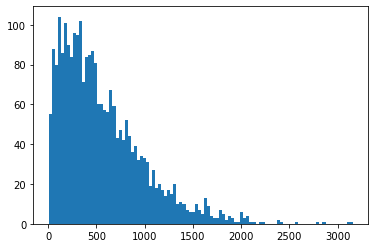

In [15]:
# Checking for outliers becaue some of the product counts are extremely high for totals over a 2 year period. 
plt.hist(data['Count_products'], bins=100);

It seems that there are only a few instances of puchasing more than 2000 unique products in a year.  There are several Households whith an excessively high quantity of products purchased, extremely high max basket value, and high average quantity.  I'm going to examine those features for their distribution of values and asess if these outliers are the result of a small group of households.

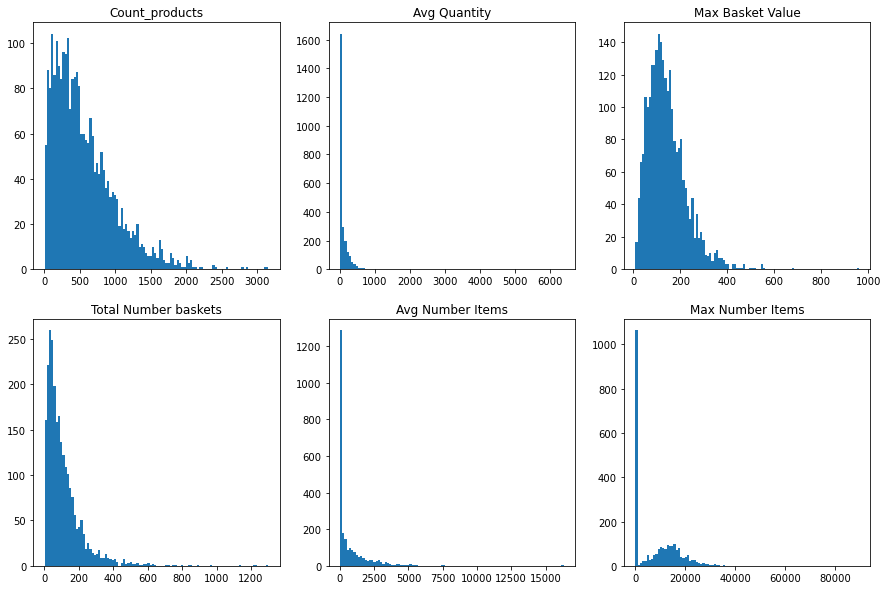

In [16]:
# Visualizing distribution of above mentioned features.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

ax1.hist(data['Count_products'], bins=100)
ax1.set_title('Count_products')
ax2.hist(data['Avg_quantity_purchased'], bins=100)
ax2.set_title('Avg Quantity')
ax3.hist(data['Max_basket_sales_value'], bins=100)
ax3.set_title('Max Basket Value')
ax4.hist(data['Total_num_baskets'], bins=100)
ax4.set_title('Total Number baskets')
ax5.hist(data['Avg_num_items'], bins=100)
ax5.set_title('Avg Number Items')
ax6.hist(data['Max_num_items'], bins=100)
ax6.set_title('Max Number Items');

In [17]:
data[['Count_products', 'Avg_quantity_purchased', 'Max_basket_sales_value', 'Total_num_baskets', 'Avg_num_items', 
     'Max_num_items']].describe()

,Count_products,Avg_quantity_purchased,Max_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,560.587600,92.077015,141.831536,110.593600,726.704471,8303.414800
std,435.957889,242.583572,82.778394,115.669368,1239.624316,8825.811777
min,4.000000,0.875000,8.170000,1.000000,1.593750,4.000000
25%,230.750000,1.309775,83.667500,39.000000,13.506579,60.000000
50%,455.000000,14.949832,127.995000,79.000000,137.474506,7522.500000
75%,788.000000,115.578377,184.465000,142.250000,965.783630,14891.250000
max,3159.000000,6393.964646,961.490000,1300.000000,16322.500000,89638.000000


It seems that there is a relatively small number of 'households' which are purchasing extremely frequently, as well as a section of househols which are purchasing an extremely large amount of products. 

These numbers are records of purchases from aross a 2-year period.  What I need to do next is assess if these are the same households or if there's something else going on with my data. 

In [18]:
# creating sets of the indexes of households which are in the upper quartile for these features
avg_quant = set(data[data['Avg_quantity_purchased'] > 115].index)
count_prod = set(data[data['Count_products'] > 788].index)
max_bask = set(data[data['Max_basket_sales_value'] > 185].index)
num_bask = set(data[data['Total_num_baskets'] > 142].index)
avg_num = set(data[data['Avg_num_items'] > 966].index)
max_num = set(data[data['Max_num_items'] > 14891].index)
#set which has the index for all households which appear in all 6 'high roller' quartiles
High_rollers = list(set.intersection(avg_quant, count_prod, max_bask, num_bask, avg_num, max_num))

In [19]:
print('Count of households in all 6 outlier groups: ', len(High_rollers))
print('Count of households in a quartile: ', len(avg_quant))

Count of households in all 6 outlier groups:  85
Count of households in a quartile:  628


In [20]:
high = data.loc[High_rollers]
high[['Count_products', 'Avg_quantity_purchased', 'Max_basket_sales_value', 'Total_num_baskets', 'Avg_num_items', 
     'Max_num_items']].describe()

,Count_products,Avg_quantity_purchased,Max_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1387.223529,267.615660,272.035647,275.658824,2954.034573,22288.905882
std,432.360640,138.739725,106.357617,131.394585,1432.482660,11543.890851
min,811.000000,115.350549,189.610000,143.000000,1086.772152,14913.000000
25%,1095.000000,174.405833,209.710000,180.000000,1720.310127,17162.000000
50%,1274.000000,235.760984,249.350000,224.000000,2744.701422,19385.000000
75%,1628.000000,312.542601,288.740000,344.000000,3545.992874,22932.000000
max,2844.000000,1017.469226,961.490000,797.000000,7429.381426,89638.000000


It seems that the 85 households which intersect across the top quartile for the 6 features with extreme outliers are certainly unusual shoppers. This group purchased an AVERAGE of 1387 unique products over a 2 year period - a normal person could MAYBE purchase 1387 items in that time, let alone unique ones. 

I think it highly likely that this data set is not limited to 'households' but also includes corporate clients that are placing large orders from this superstore chain.  I'll need to do more qualitative research to uncover exactly what a reasonable upper limit would be for a lot of these aggregate metrics. 

In [21]:
data = data.astype({'CampaignsRedeemed':'int64', 'CampaignsSent':'int64',
       'CouponRedeemed_Count':'int64', 'CouponSent_Count':'int64',
      'Count_products':'int64', 'Count_depts':'int64', 'Count_sub_cagtegory':'int64', 'Most_freq_product':'int64',
       'Least_freq_product':'int64', 'High_volume_product':'int64','Max_basket_sales_value':'int64',
       'Min_basket_sales_value':'int64', 'Total_num_baskets':'int64',
       'Max_num_items':'int64', 'Min_num_items':'int64', 'Num_stores_visited':'int64',
       'Most_freq_store':'int64', 'Most_freq_time':'int64', 'First_active_day':'int64',
       'Last_active_day':'int64', 'Recency':'int64'})

In [29]:
# Min_num_items minimum value cannot be zero (this is a quirk of filling Null values in SQL with 0 previously)
# Setting those values to 1 now. 
data['Min_num_items'][data['Min_num_items'] == 0] = 1

<ipython-input-29-0fbee0e89f5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Min_num_items'][data['Min_num_items'] == 0] = 1


In [36]:
# Adjusting 4 values where the max loyalty discount was positive and on a massive 
data.Max_loyalty_disc[data.Max_loyalty_disc > 0] = 0

<ipython-input-36-8bbe72860a60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Max_loyalty_disc[data.Max_loyalty_disc > 0] = 0


count    2500.000000
mean       -0.049716
std         0.533296
min       -17.690000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: Max_loyalty_disc, dtype: float64

In [37]:
data.to_csv('../Data/Cleaned_Customer_Data')

At this point I've set the data set to the correct data types, fixed erroneous SQL queries from previous work to be accurate, renamed columns, deleted duplicates, and dropped columns that provided no additional value.  The next step in this process will be to continue some of the initial examinination of oulier patterns and additional EDA prior to engaging in clustering for customer segmentation purposes. That work can be found in the subsequent notebook in this repository